In [1]:

import os
import glob
import dbfread
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

datafile = os.path.expanduser('country wise population.csv')
shapefile = os.path.expanduser('ne_10m_admin_0_countries_lakes.shp')

colors = 9
cmap = 'coolwarm'
figsize = (18, 12)
year = '2019'
cols = ['Country Name', 'Country Code', year]
title = 'World Population'.format(year)

In [2]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']]
gdf.sample(5)

,ADM0_A3,geometry
40,OMN,"MULTIPOLYGON (((56.26062 25.33108, 56.29069 25..."
124,BDI,"POLYGON ((30.55460 -2.40063, 30.52148 -2.44228..."
198,BRB,"POLYGON ((-59.42691 13.16039, -59.43004 13.125..."
23,SUR,"POLYGON ((-54.17097 5.34837, -54.19046 5.32575..."
118,TLS,"MULTIPOLYGON (((124.45053 -9.18019, 124.45150 ..."


In [3]:
df = pd.read_csv(datafile, names=cols)
df.sample(5)

,Country Name,Country Code,2019
187,Palau,PLW,1.800800e+04
240,Sub-Saharan Africa (IDA & IBRD countries),TSS,1.106958e+09
212,Somalia,SOM,1.544290e+07
206,Senegal,SEN,1.629636e+07
136,Liechtenstein,LIE,3.801900e+04


In [4]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.sample(5)

,ADM0_A3,geometry,Country Name,Country Code,2019
187,VGB,"MULTIPOLYGON (((-64.63512 18.40550, -64.64367 ...",British Virgin Islands,VGB,30030.0
133,MDA,"POLYGON ((26.61789 48.25897, 26.61861 48.26718...",Moldova,MDA,2657637.0
207,ASM,"MULTIPOLYGON (((-170.59101 -14.26483, -170.576...",American Samoa,ASM,55312.0
88,NLD,"MULTIPOLYGON (((7.19459 53.24502, 7.19747 53.2...",Netherlands,NLD,17332850.0
162,NZL,"MULTIPOLYGON (((166.13697 -50.86435, 166.20525...",New Zealand,NZL,4917000.0


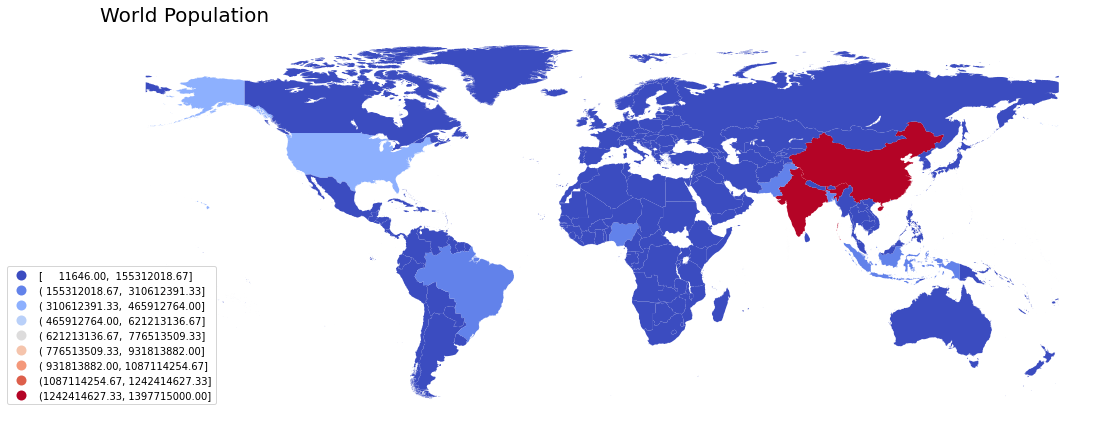

In [5]:
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_axis_off()